In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Load in the libraries and the data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#checking working directory and read the titanic data
os.getcwd()

'C:\\Users\\juhyu\\OneDrive\\Desktop\\JH\\SIM\\Year2\\Programming for data science\\Practice Assignment 08\\Practice Assignment 08'

In [23]:
titanic = pd.read_csv("titanic.csv")

Let's take a look at the data

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Create the column `family size`, which is the number of sibling + spouses + number of parents + number of children + him/herself

In [5]:
titanic['family size'] = titanic['SibSp']+titanic['Parch'] + 1
#titanic['SibSp'] shows the number of siblings/spouses aboard Titanic
#titanic['Parch'] shows the number of children/parents aboard Titanic

### Q1 Bar charts to describe gender , ticket class and survival of passengers

#### a. Gender of the passengers onboard

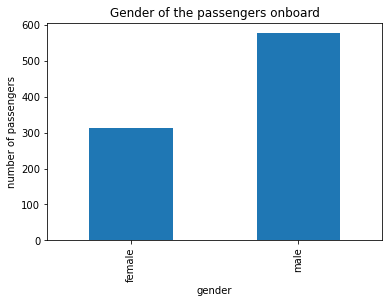

In [6]:
titanic.groupby('Sex').size().plot.bar(title = 'Gender of the passengers onboard', ylabel = "number of passengers", xlabel = "gender");

#### b. Ticket class of the passengers onboard

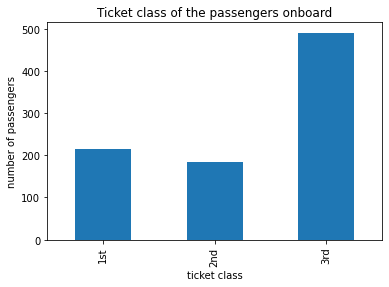

In [7]:
ax = titanic.groupby('Pclass').size().plot.bar(title = 'Ticket class of the passengers onboard', xlabel = "ticket class", ylabel = "number of passengers")
ax.set_xticklabels(("1st", "2nd", "3rd"));
#xticklables: naming for each of the bar - don't need to mutate the value

#### c. Survival of the passengers onboard

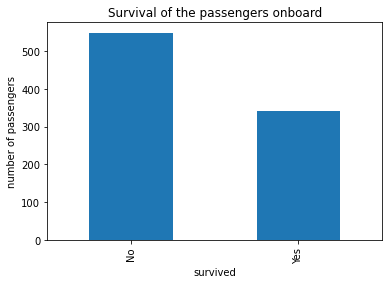

In [8]:
ax = titanic.groupby('Survived').size().plot.bar(title = 'Survival of the passengers onboard', xlabel = "survived", ylabel = "number of passengers")
ax.set_xticklabels(("No", "Yes"));
#survive graph will be survived('yes') or 'no'

### Q2 Age of the passengers onboard

#### a. Histogram for passengers' age

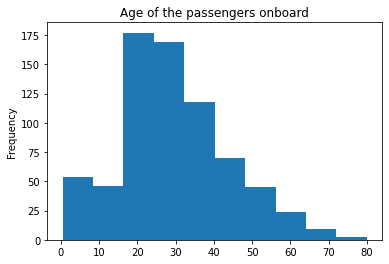

In [9]:
titanic['Age'].plot(kind = 'hist', title = "Age of the passengers onboard");

#### b. Boxplot (group by ticket class)

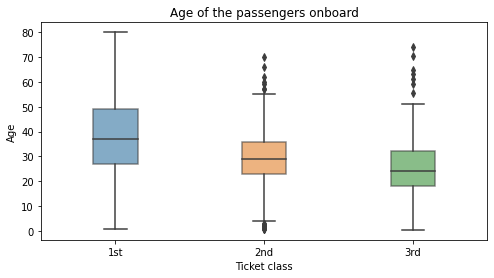

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))
#8inch - horizonal, 4inch - vertical

#used sns to add colors
sns.boxplot(data = titanic, x = 'Pclass', y = 'Age', width = 0.3, #width of box = 0.3 
            boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way
                                        #alpha=transparency

ax.set_xlabel("Ticket class")
ax.set_title("Age of the passengers onboard")
ax.set_xticklabels(("1st", "2nd", "3rd"));
plt.show()


#### b. Boxplot (group by survival)

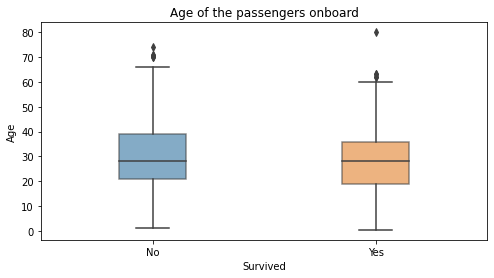

In [11]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = titanic, x = 'Survived', y = 'Age', width = 0.3, 
            boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way

ax.set_xlabel("Survived")
ax.set_xticklabels(("No", "Yes"));
ax.set_title("Age of the passengers onboard")
plt.show()

### Q3 Travel fare of the passengers onboard

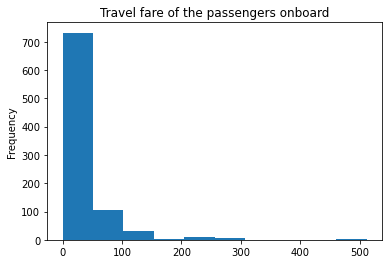

In [12]:
#'fare': continous data - plot it in histogram
titanic['Fare'].plot(kind = 'hist', title = "Travel fare of the passengers onboard", xlabel = 'fare');

In [13]:
titanic[['Fare']].apply(lambda x: x == 0).groupby('Fare').size()

Fare
False    876
True      15
dtype: int64

### Q4 Family size per ticket class

Here let us explore graphs different from what we have shown for the R solution:

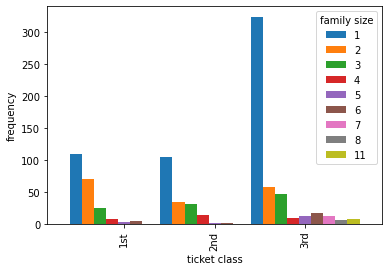

In [14]:
ax = titanic.groupby(['Pclass', 'family size']).size().unstack().fillna(0).plot.bar(width=1.2, xlabel = 'ticket class', ylabel = 'frequency')
#unstack the bar graph
ax.set_xticklabels(("1st", "2nd", "3rd"));

Or histogram to show the family size per ticket class

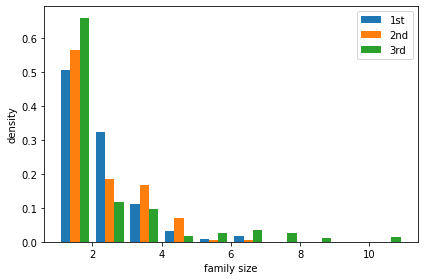

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#plots the histogram
fig, ax = plt.subplots()
ax.hist([titanic.loc[titanic.Pclass == class_idx, "family size"]  #location based on family size
         for class_idx in range(1,4)], density = True, #range(1,4)->include 1, exclude 4 
        label=['1st', '2nd', '3rd'])  #label-> label for legend

ax.set_ylabel("density")
ax.set_xlabel("family size")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

### Q5 Stacked bar charts to describe the survival rate per gender and ticket class

#### Survival rate per gender

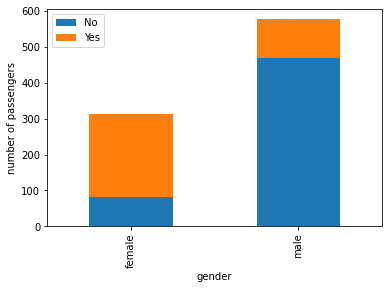

In [16]:
survival = titanic.groupby(['Sex','Survived']).size().unstack()
survival.columns = ["No", "Yes"]
survival.plot(kind='bar', stacked = True, ylabel = "number of passengers", xlabel = "gender");

#### Survival rate per travel class

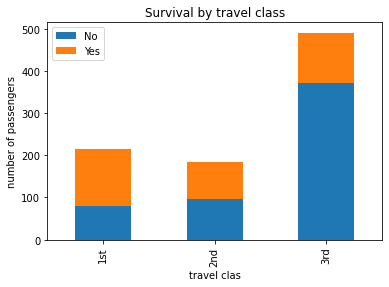

In [17]:
survival = titanic.groupby(['Pclass','Survived']).size().unstack()
survival.columns = ["No", "Yes"]
survival.index = ["1st", "2nd", "3rd"] #changed index for 'Pclass'
survival.plot(kind='bar', stacked = True, ylabel = "number of passengers", xlabel = "travel clas", title = "Survival by travel class");

### Q6. Violin chart describing the survival rate per age and gender

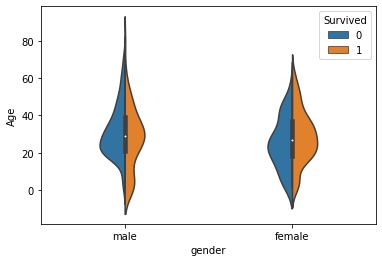

In [21]:
ax = sns.violinplot(data = titanic, x = 'Sex', y = 'Age', hue = 'Survived', width = 0.3, split=True)  #hue: different color, split:based on hue
ax.set_xlabel("gender")
plt.show()

### Q7. Violin chart describing the survival rate per age and ticket class

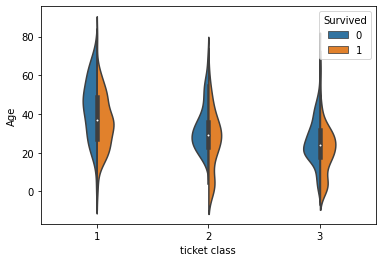

In [19]:
ax = sns.violinplot(data = titanic, x = 'Pclass', y = 'Age', hue = 'Survived', width = 0.3, split=True)
ax.set_xlabel("ticket class")
plt.show()